In [1]:
try:
    import SEM_Image as SI
    import CD_SEM_Calc as calc
    
except ImportError:
    import sys
    # Python version 3.10.12 is the newest version supported
    !{sys.executable} -m pip install --user --upgrade matplotlib tifffile

Select the .tif file that you want to analyse.

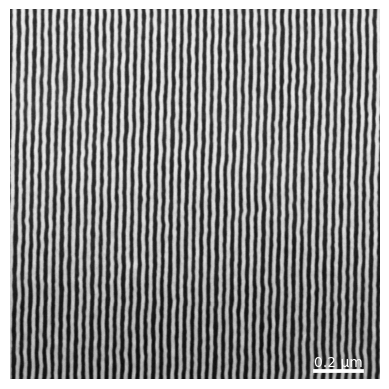

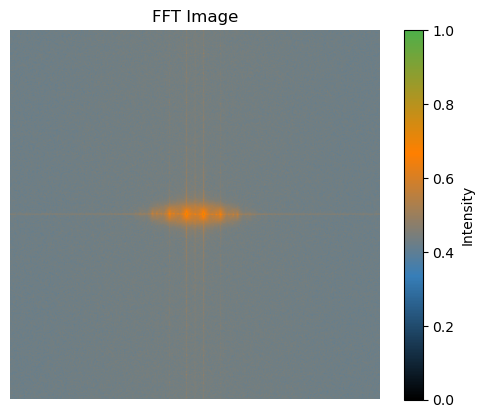

Angle of rotation: 0


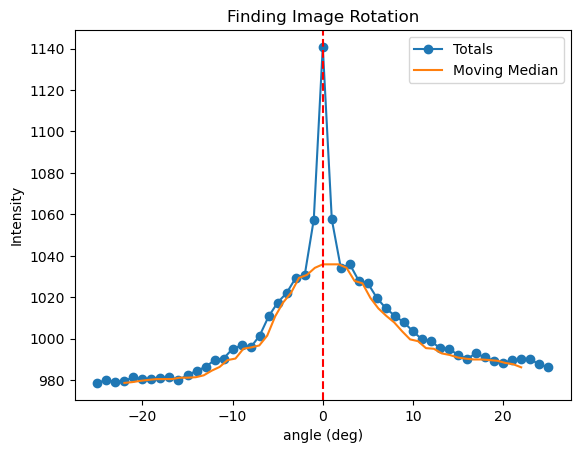

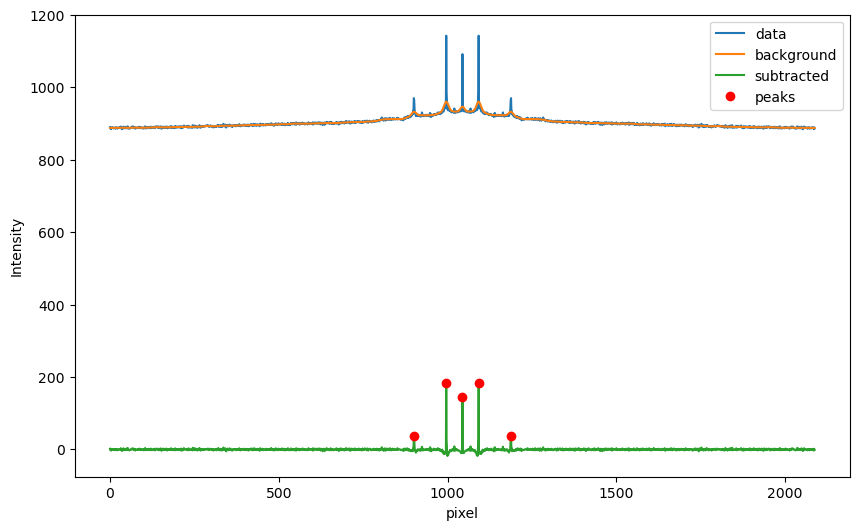

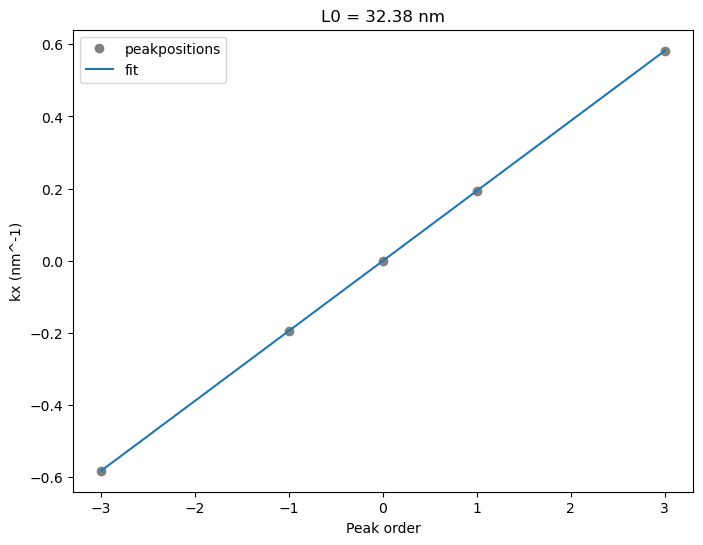

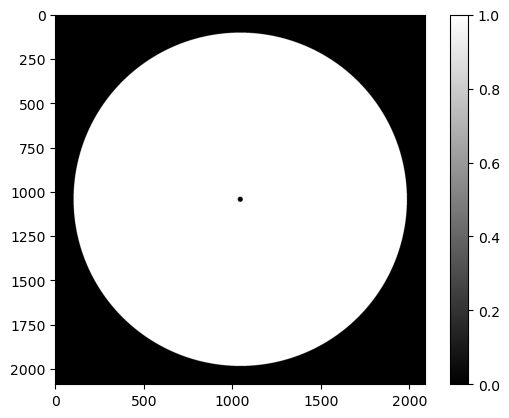

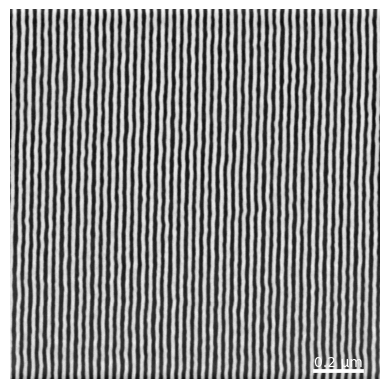

In [2]:
Image1 = SI.SEMImageDetails()  # Initializes all the variables for the object
Image1()  # This will run all the analysis